<a href="https://colab.research.google.com/github/JawadSk12/ML-Lab/blob/main/ML_Asg1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Jawad Shaikh

23102B0009

CMPN - B

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Dataset from UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

columns = [
    "id", "diagnosis",
    "radius_mean", "texture_mean", "perimeter_mean", "area_mean",
    "smoothness_mean", "compactness_mean", "concavity_mean",
    "concave_points_mean", "symmetry_mean", "fractal_dimension_mean",
    "radius_se", "texture_se", "perimeter_se", "area_se",
    "smoothness_se", "compactness_se", "concavity_se",
    "concave_points_se", "symmetry_se", "fractal_dimension_se",
    "radius_worst", "texture_worst", "perimeter_worst", "area_worst",
    "smoothness_worst", "compactness_worst", "concavity_worst",
    "concave_points_worst", "symmetry_worst", "fractal_dimension_worst"
]

df = pd.read_csv(url, header=None, names=columns)
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.shape


(569, 32)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

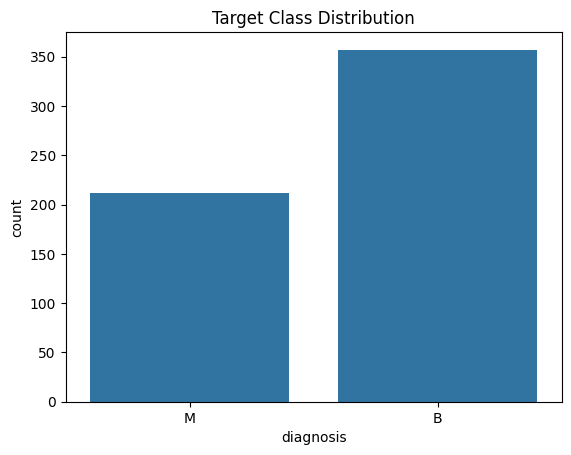

In [ ]:
df["diagnosis"].value_counts()
sns.countplot(x="diagnosis", data=df)
plt.title("Target Class Distribution")
plt.show()



In [ ]:
# M = 1 (Malignant)
# B = 0 (Benign)

df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.drop("id", axis=1, inplace=True)


In [ ]:
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (569, 30)
Target shape: (569,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training samples:", X_train.shape[0])
print("Testing samples :", X_test.shape[0])


Training samples: 455
Testing samples : 114


In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
log_model = LogisticRegression(max_iter=5000)
log_model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=5000)

In [ ]:
train_pred_log = log_model.predict(X_train_scaled)
test_pred_log = log_model.predict(X_test_scaled)

train_error_log = 1 - accuracy_score(y_train, train_pred_log)
test_error_log = 1 - accuracy_score(y_test, test_pred_log)

print("Training Error:", train_error_log)
print("Testing Error :", test_error_log)
print("Generalization Gap:", test_error_log - train_error_log)


Training Error: 0.01318681318681314
Testing Error : 0.03508771929824561
Generalization Gap: 0.021900906111432472


In [ ]:
print("Accuracy :", accuracy_score(y_test, test_pred_log))
print("Precision:", precision_score(y_test, test_pred_log))
print("Recall   :", recall_score(y_test, test_pred_log))
print("F1-score :", f1_score(y_test, test_pred_log))


Accuracy : 0.9649122807017544
Precision: 0.975
Recall   : 0.9285714285714286
F1-score : 0.9512195121951219


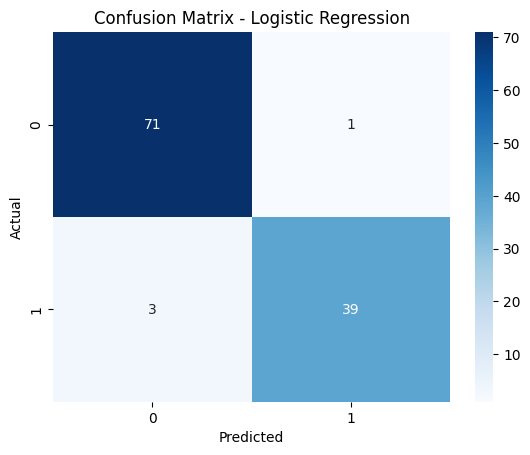

In [ ]:
cm_log = confusion_matrix(y_test, test_pred_log)
cm_log

sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
train_pred_tree = tree_model.predict(X_train)
test_pred_tree = tree_model.predict(X_test)

train_error_tree = 1 - accuracy_score(y_train, train_pred_tree)
test_error_tree = 1 - accuracy_score(y_test, test_pred_tree)

print("Training Error:", train_error_tree)
print("Testing Error :", test_error_tree)
print("Generalization Gap:", test_error_tree - train_error_tree)


Training Error: 0.0
Testing Error : 0.07017543859649122
Generalization Gap: 0.07017543859649122


In [ ]:
print("Accuracy :", accuracy_score(y_test, test_pred_tree))
print("Precision:", precision_score(y_test, test_pred_tree))
print("Recall   :", recall_score(y_test, test_pred_tree))
print("F1-score :", f1_score(y_test, test_pred_tree))


Accuracy : 0.9298245614035088
Precision: 0.9047619047619048
Recall   : 0.9047619047619048
F1-score : 0.9047619047619048


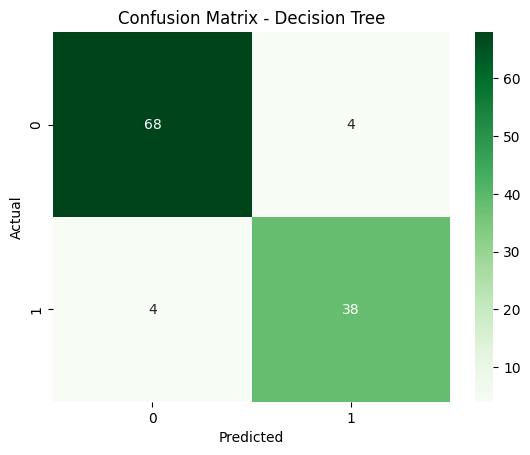

In [ ]:
cm_tree = confusion_matrix(y_test, test_pred_tree)

sns.heatmap(cm_tree, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree"],
    "Train Error": [train_error_log, train_error_tree],
    "Test Error": [test_error_log, test_error_tree],
    "Generalization Gap": [
        test_error_log - train_error_log,
        test_error_tree - train_error_tree
    ]
})

comparison


,Model,Train Error,Test Error,Generalization Gap
0,Logistic Regression,0.013187,0.035088,0.021901
1,Decision Tree,0.000000,0.070175,0.070175
